In [ ]:
#Import all necessary libraries for clustering, visualization, and evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering,
                             MeanShift, SpectralClustering, AffinityPropagation, Birch, OPTICS)
from sklearn.mixture import GaussianMixture
import hdbscan
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import pandas as pd
import time
import os


In [ ]:
# Generate synthetic datasets= moons, circles, and a combined version of both
def generate_datasets(n_samples=1500, random_state=42):
    X_moons, y_moons = make_moons(n_samples=n_samples//2, noise=0.05, random_state=random_state)
    X_circles, y_circles = make_circles(n_samples=n_samples//2, factor=0.5, noise=0.05, random_state=random_state)
    X_combined = np.vstack([X_moons, X_circles])
    y_combined = np.hstack([y_moons, y_circles + 2])
    return {
        'moons': (X_moons, y_moons),
        'circles': (X_circles, y_circles),
        'combined_moons_circles': (X_combined, y_combined)
    }

datasets = generate_datasets()


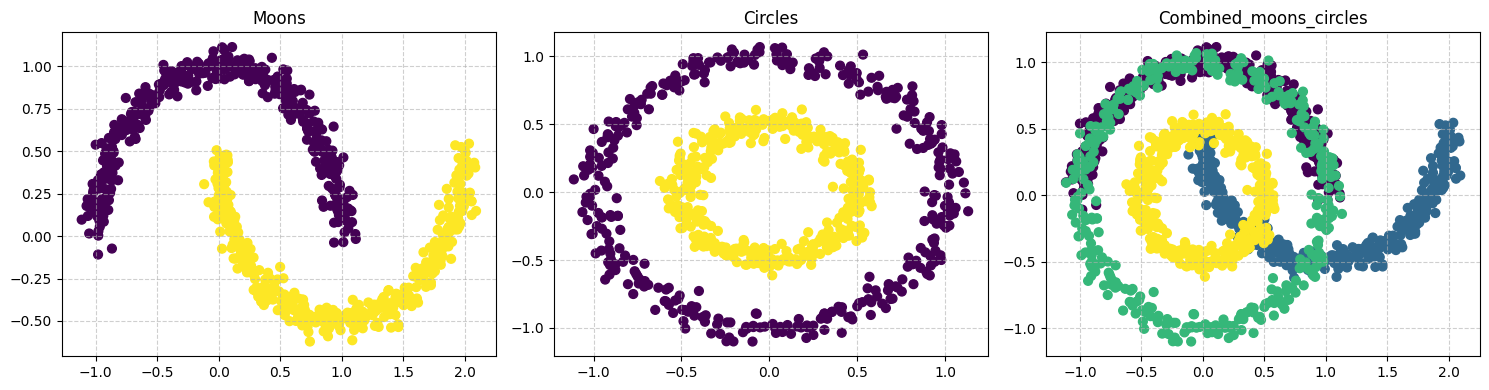

In [ ]:
#Plot and visualize the three synthetic datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, (X, y)) in zip(axes, datasets.items()):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=40)
    ax.set_title(name.capitalize())
    ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate clustering output using 3 silhouette, calinski, davies metrics
def evaluate_clustering(X, labels):
    if len(np.unique(labels)) < 2:
        return None, None, None
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    return silhouette, calinski, davies


In [ ]:
# Plot results for each algorithm
def plot_clustering_results(dataset_name, X, algorithms, scaler=StandardScaler()):
    X_scaled = scaler.fit_transform(X)
    n_algorithms = len(algorithms)
    n_rows = (n_algorithms + 2) // 4
    fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))
    axes = axes.ravel()


    axes[0].scatter(X[:, 0], X[:, 1], c='blue', s=40)
    axes[0].set_title(f'Original {dataset_name} Dataset')
    axes[0].grid(True, linestyle='--', alpha=0.6)


    for idx, (name, algorithm) in enumerate(algorithms.items(), 1):
        try:
            if name == 'MeanShift':
                algorithm.fit(X_scaled)
                labels = algorithm.labels_
            else:
                labels = algorithm.fit_predict(X_scaled)

            n_clusters = len(np.unique(labels[labels >= 0]))
            silhouette = silhouette_score(X_scaled, labels) if n_clusters > 1 else 0

            scatter = axes[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
            axes[idx].set_title(f'{name}\nClusters: {n_clusters}\nSilhouette: {silhouette:.2f}')
            axes[idx].grid(True, linestyle='--', alpha=0.6)
            plt.colorbar(scatter, ax=axes[idx])

        except Exception as e:
            print(f"Error with {name}: {e}")
            axes[idx].text(0.5, 0.5, f'Error with {name}', ha='center', va='center')

    for idx in range(len(algorithms) + 1, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


Processing moons dataset...


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


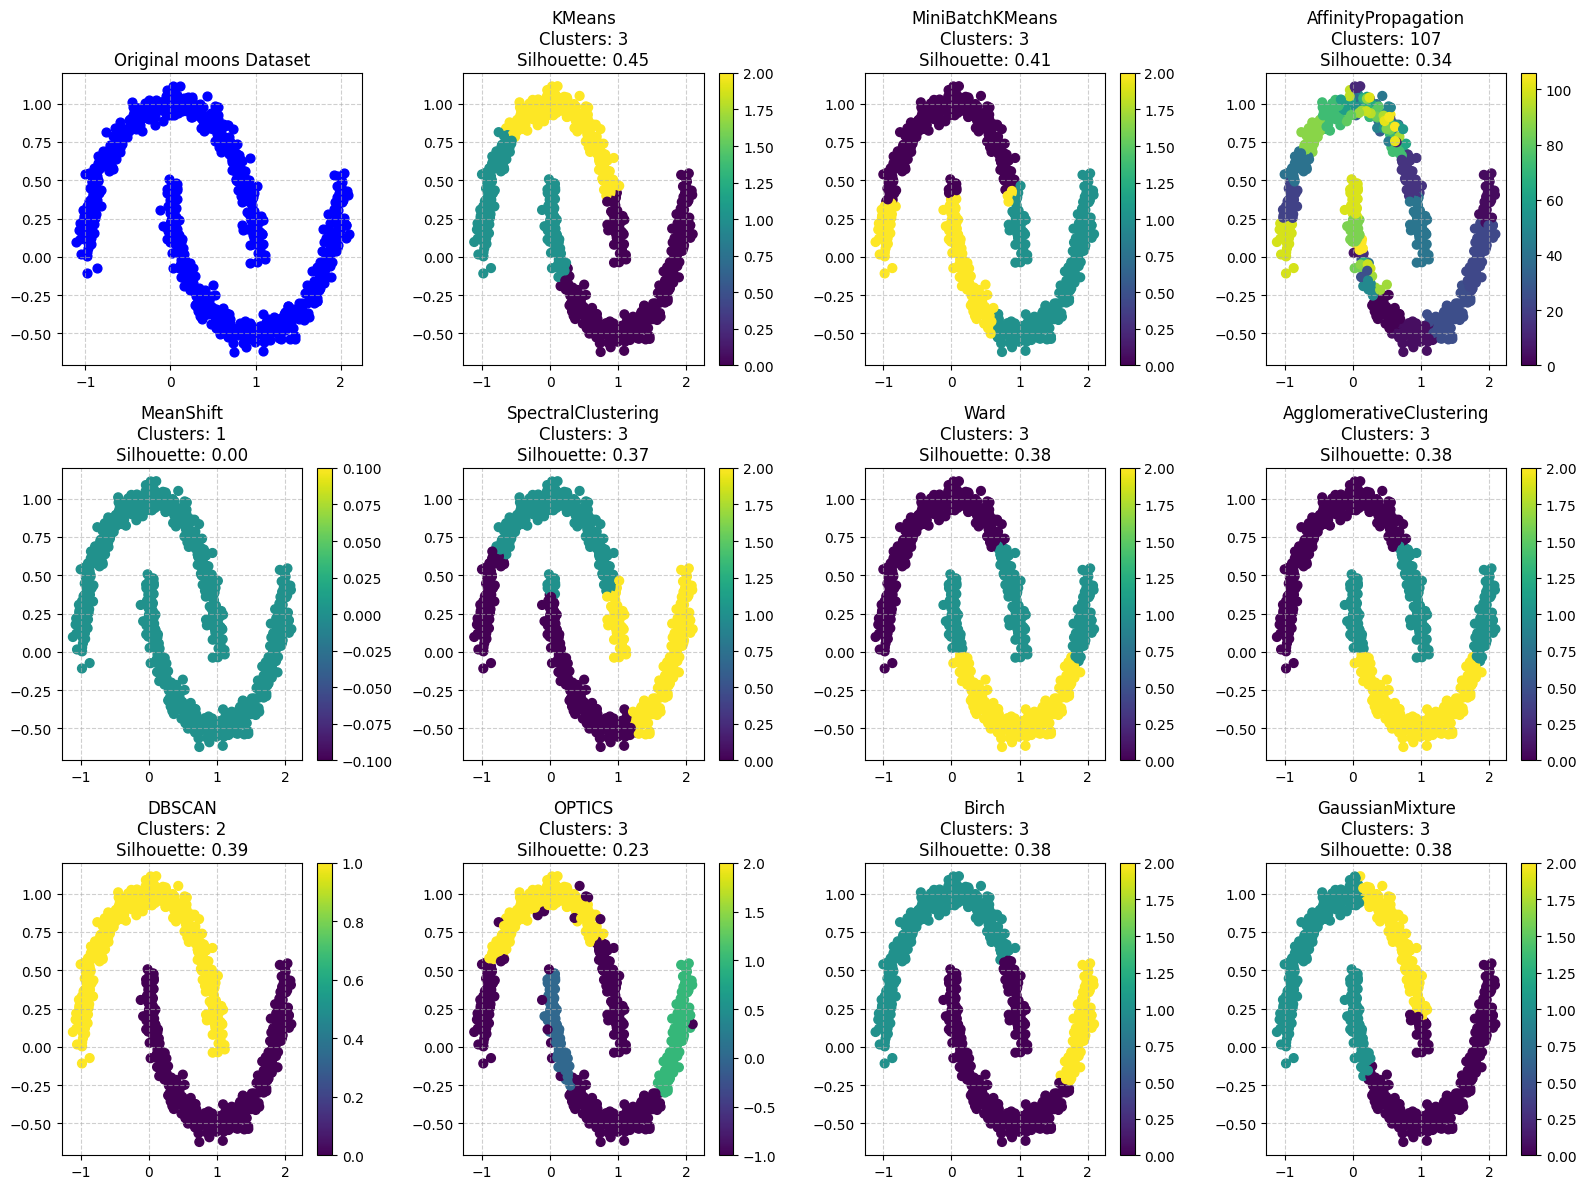


Processing circles dataset...


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


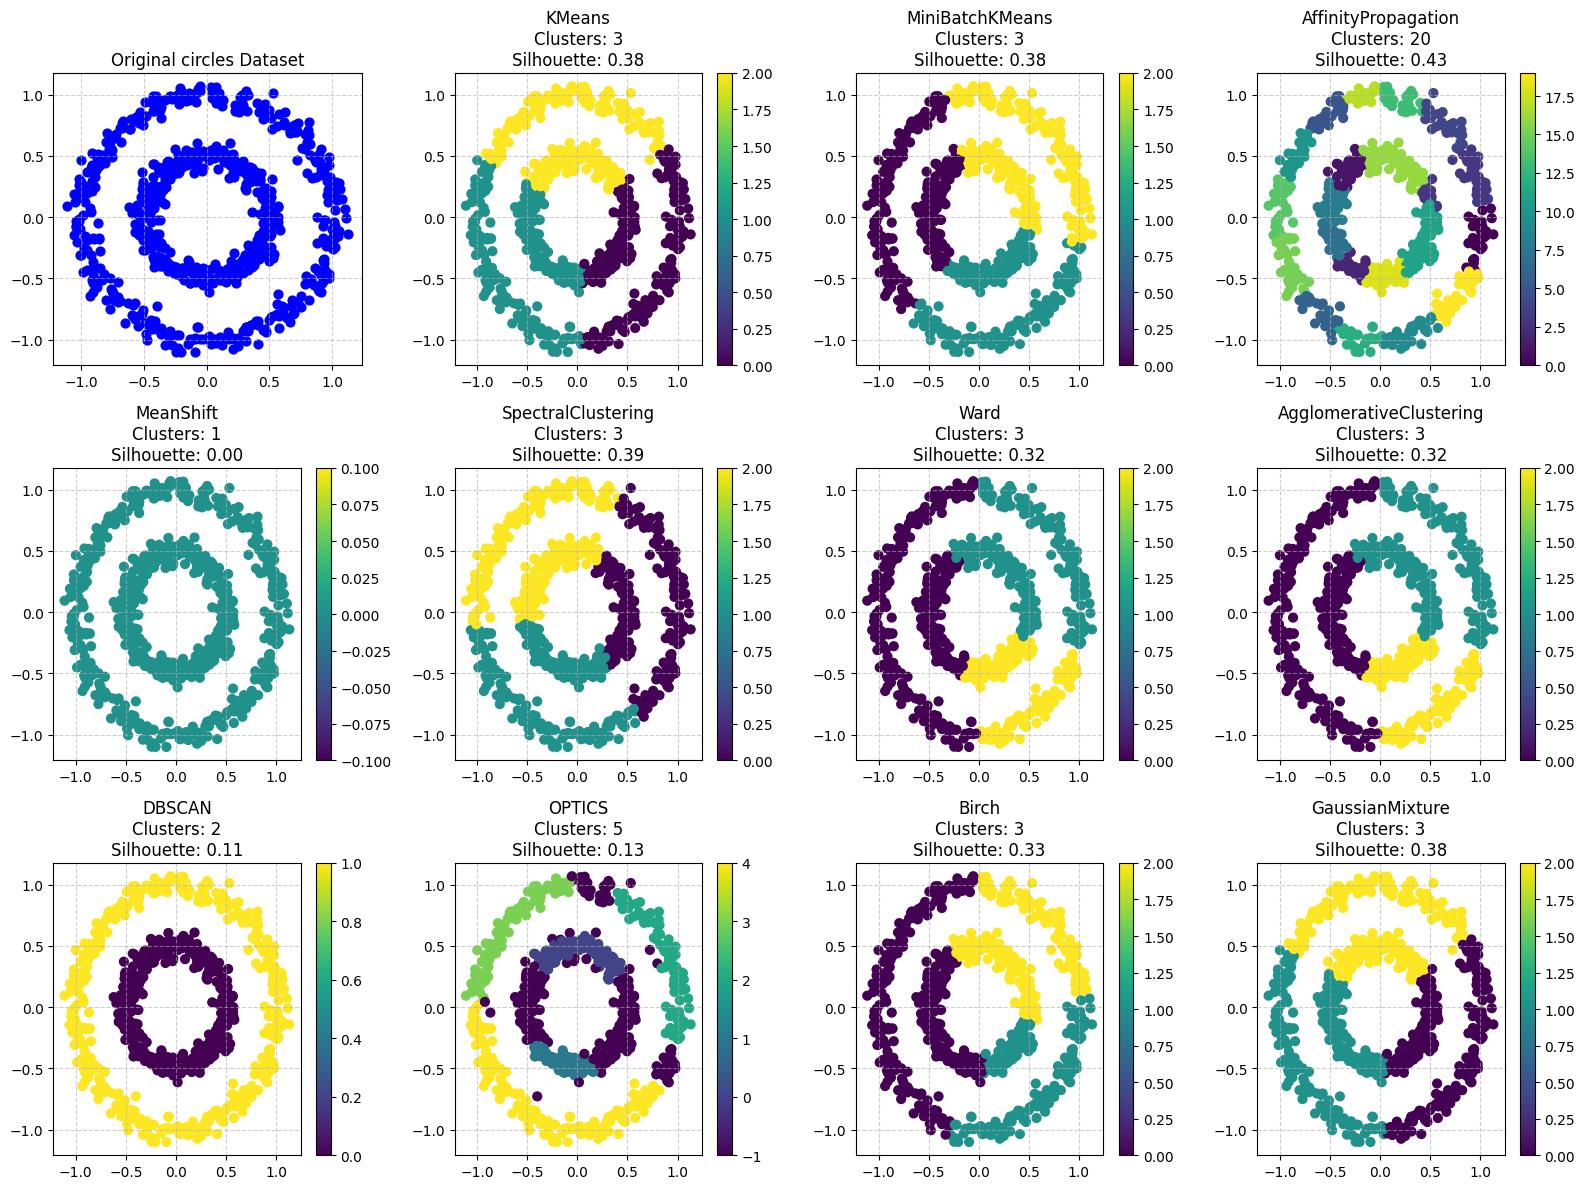


Processing combined_moons_circles dataset...


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


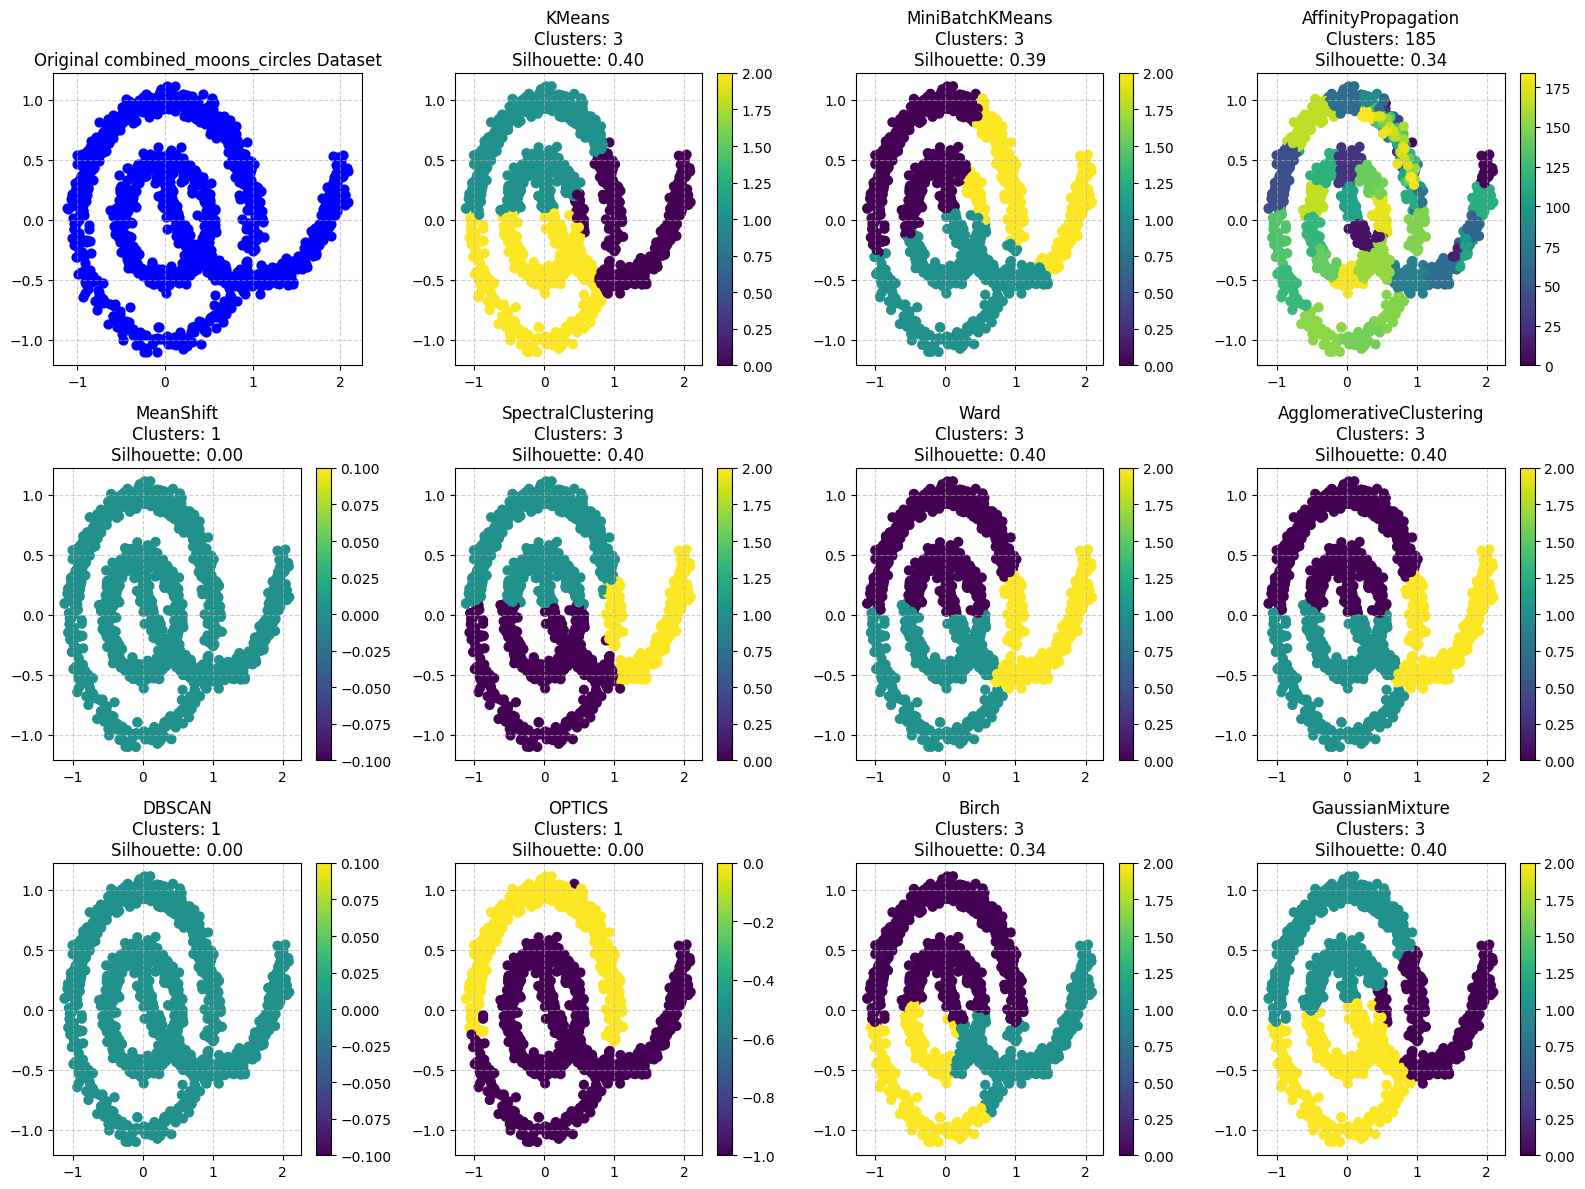

In [ ]:
# Function to generate synthetic datasets: moons, circles, and a combined version of both
def generate_datasets(n_samples=1500, random_state=42):
    X_moons, y_moons = make_moons(n_samples=n_samples//2, noise=0.05, random_state=random_state)
    X_circles, y_circles = make_circles(n_samples=n_samples//2, factor=0.5, noise=0.05, random_state=random_state)
    X_combined = np.vstack([X_moons, X_circles])
    y_combined = np.hstack([y_moons, y_circles + 2])
    return {
        'moons': (X_moons, y_moons),
        'circles': (X_circles, y_circles),
        'combined_moons_circles': (X_combined, y_combined)
    }

#clustering algorithms with their initialized parameters
def get_clustering_algorithms():
    return {
        'KMeans': KMeans(n_clusters=3, random_state=42),
        'MiniBatchKMeans': MiniBatchKMeans(n_clusters=3, random_state=42),
        'AffinityPropagation': AffinityPropagation(random_state=42),
        'MeanShift': MeanShift(bandwidth=2),
        'SpectralClustering': SpectralClustering(n_clusters=3, random_state=42),
        'Ward': AgglomerativeClustering(n_clusters=3, linkage='ward'),
        'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
        'DBSCAN': DBSCAN(eps=0.3, min_samples=5),
        'OPTICS': OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1),
        'Birch': Birch(n_clusters=3),
        'GaussianMixture': GaussianMixture(n_components=3, random_state=42)
    }
# Generate all datasets
datasets = generate_datasets()
# Get all clustering algorithms
algorithms = get_clustering_algorithms()

#plot the clustering results for each algorithm
for dataset_name, (X, y) in datasets.items():
    print(f"\nProcessing {dataset_name} dataset...")
    plot_clustering_results(dataset_name, X, algorithms)

In [82]:
results_df = pd.DataFrame(all_results)
results_df = results_df.replace("N/A", np.nan)
results_df.head()

,Dataset,Algorithm,Time (s),Clusters,Silhouette,Calinski,Davies
0,moons,KMeans,0.005796,3,0.446338,842.754590,0.890556
1,moons,MiniBatchKMeans,0.006188,3,0.410674,774.209219,0.926675
2,moons,AffinityPropagation,1.452519,107,0.342485,353.447620,0.519745
3,moons,MeanShift,3.037207,1,NaN,NaN,NaN
4,moons,SpectralClustering,0.197207,3,0.368830,578.988662,0.976002


<ipython-input-80-741c6bb8659b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Silhouette', ax=axs[0], palette='Blues_d')
<ipython-input-80-741c6bb8659b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Calinski', ax=axs[1], palette='Greens_d')
<ipython-input-80-741c6bb8659b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Davies', ax=axs[2], palette='Reds_d')


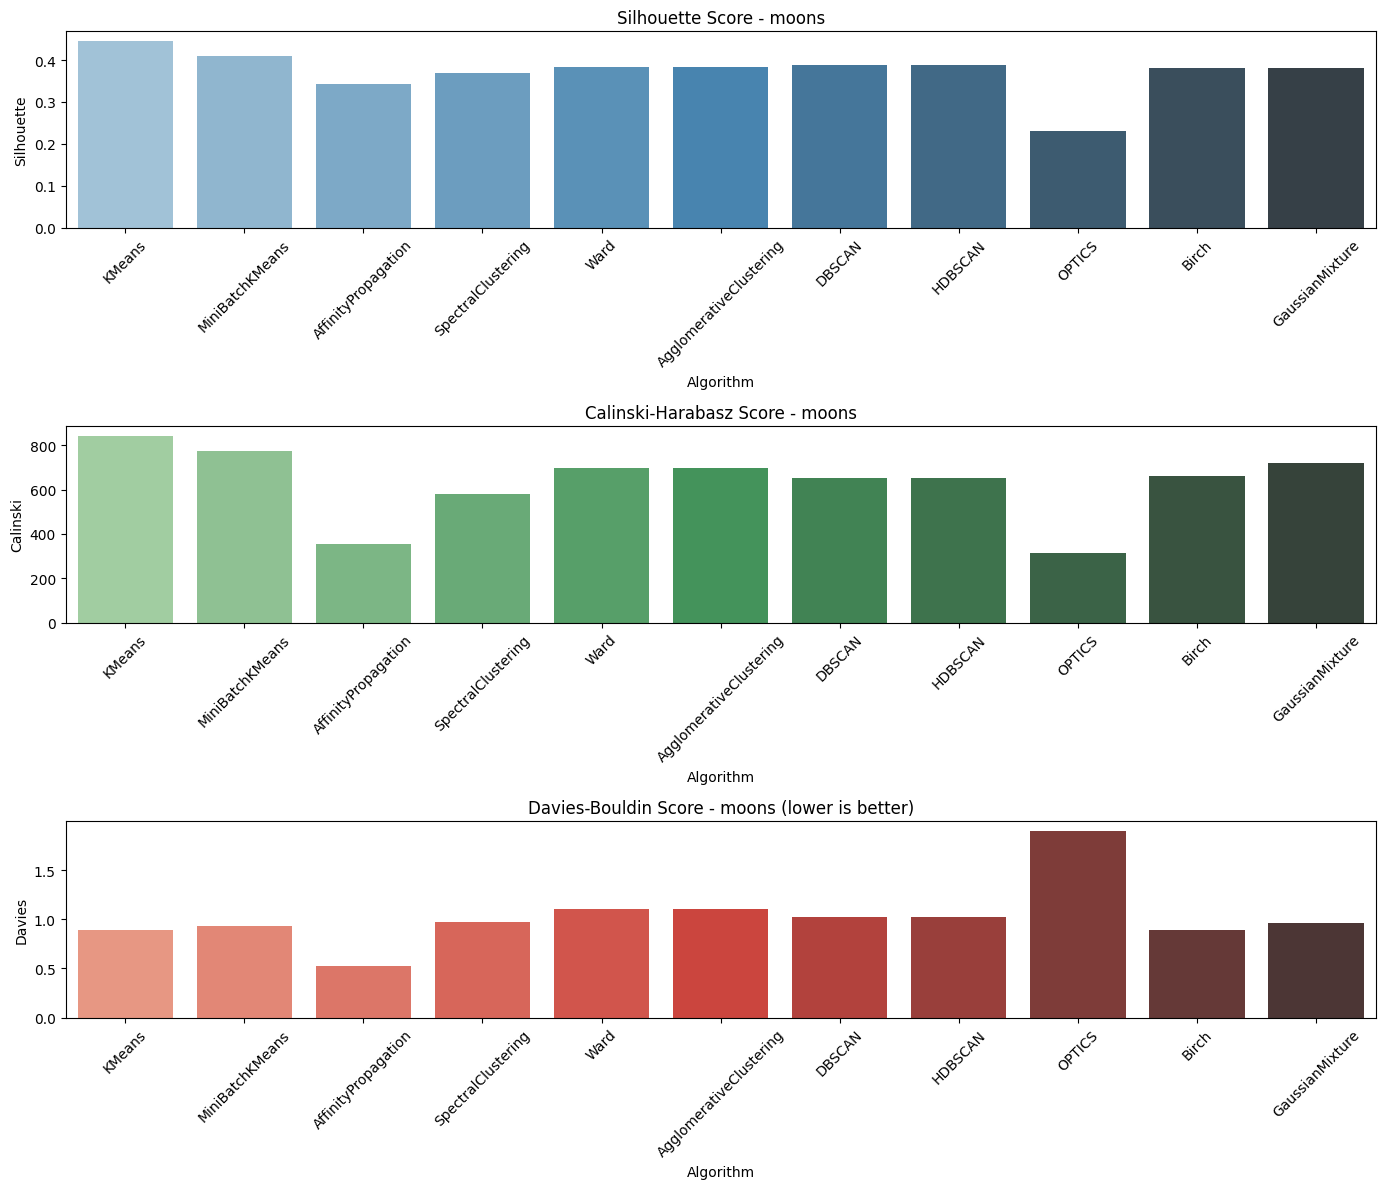

<ipython-input-80-741c6bb8659b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Silhouette', ax=axs[0], palette='Blues_d')
<ipython-input-80-741c6bb8659b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Calinski', ax=axs[1], palette='Greens_d')
<ipython-input-80-741c6bb8659b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Davies', ax=axs[2], palette='Reds_d')


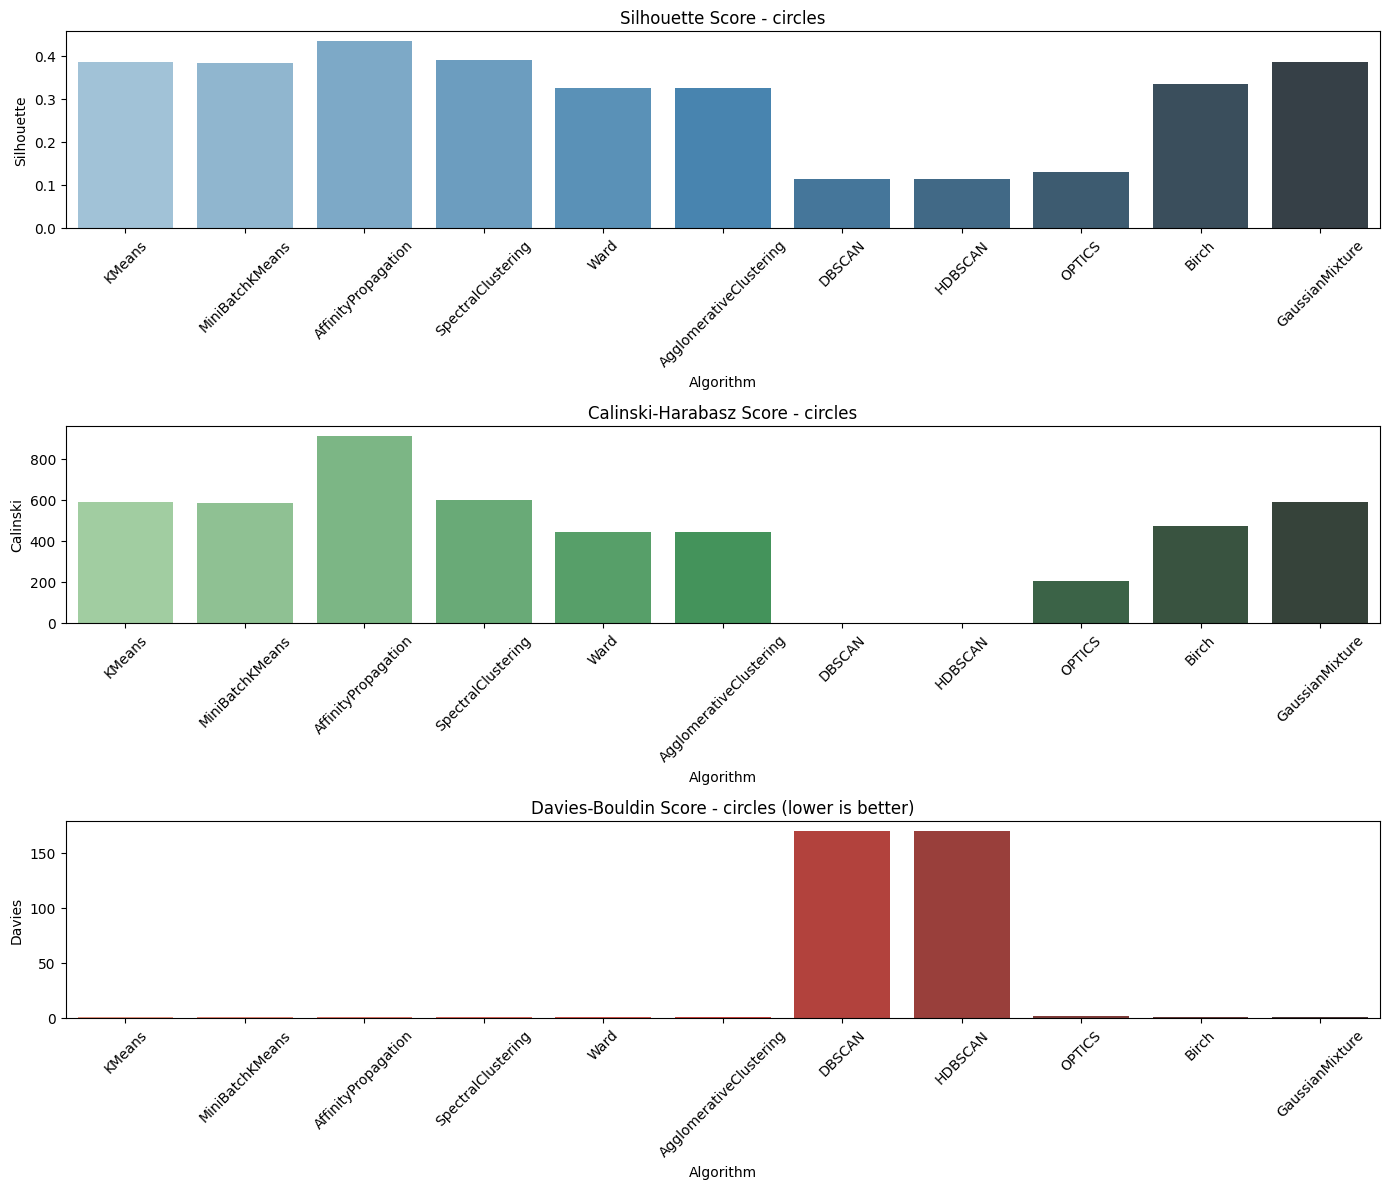

<ipython-input-80-741c6bb8659b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Silhouette', ax=axs[0], palette='Blues_d')
<ipython-input-80-741c6bb8659b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Calinski', ax=axs[1], palette='Greens_d')
<ipython-input-80-741c6bb8659b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Algorithm', y='Davies', ax=axs[2], palette='Reds_d')


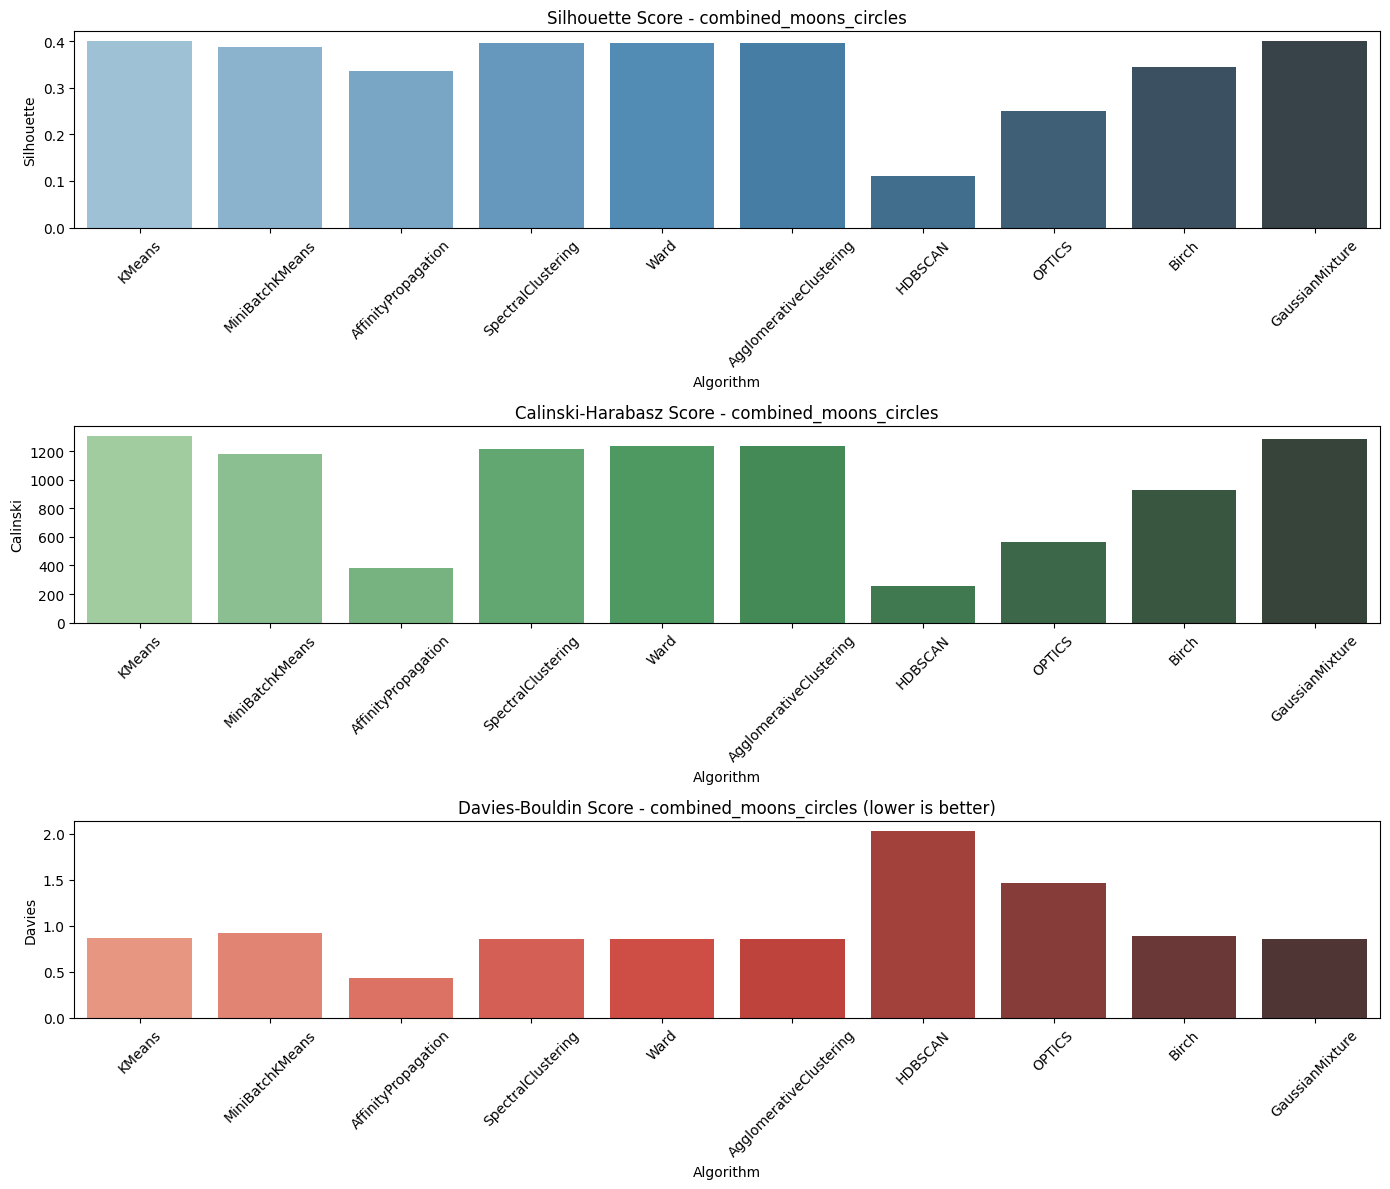

In [ ]:
# Loop through each dataset to visualize clustering evaluation scores
for dataset_name in datasets.keys():
    subset = results_df[results_df['Dataset'] == dataset_name].dropna()
    if len(subset) == 0:
        print(f"No valid results for {dataset_name}")
        continue

    fig, axs = plt.subplots(3, 1, figsize=(14, 12))

    sns.barplot(data=subset, x='Algorithm', y='Silhouette', ax=axs[0], palette='Blues_d')
    axs[0].set_title(f'Silhouette Score - {dataset_name}')
    axs[0].tick_params(axis='x', rotation=45)

    sns.barplot(data=subset, x='Algorithm', y='Calinski', ax=axs[1], palette='Greens_d')
    axs[1].set_title(f'Calinski-Harabasz Score - {dataset_name}')
    axs[1].tick_params(axis='x', rotation=45)

    sns.barplot(data=subset, x='Algorithm', y='Davies', ax=axs[2], palette='Reds_d')
    axs[2].set_title(f'Davies-Bouldin Score - {dataset_name} (lower is better)')
    axs[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

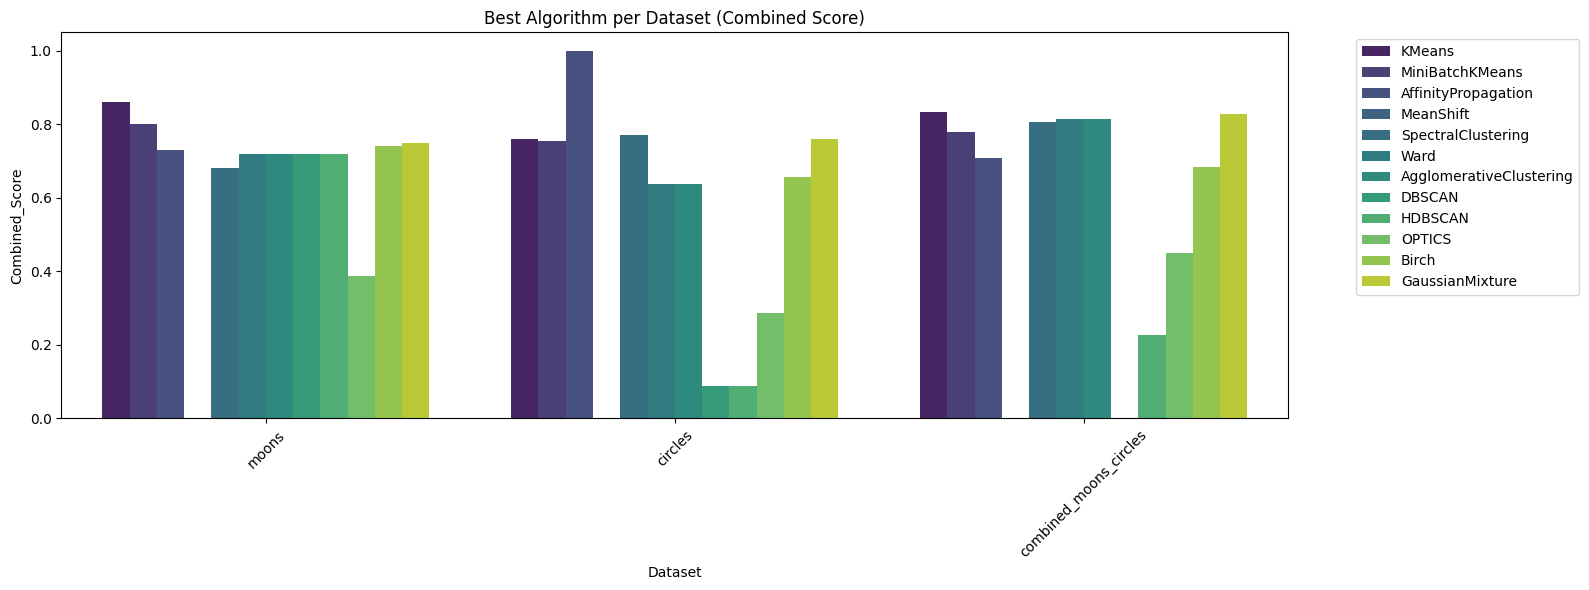

moons: KMeans (Score: 0.861)
circles: AffinityPropagation (Score: 1.000)
combined_moons_circles: KMeans (Score: 0.833)


In [ ]:
# Copy the original results DataFrame to preserve raw values
normalized = results_df.copy()

# Normalize scores within each dataset for fair comparison
for dataset in normalized['Dataset'].unique():
    mask = normalized['Dataset'] == dataset
    normalized.loc[mask, 'Silhouette'] /= normalized.loc[mask, 'Silhouette'].max()
    normalized.loc[mask, 'Calinski'] /= normalized.loc[mask, 'Calinski'].max()
    normalized.loc[mask, 'Davies'] = normalized.loc[mask, 'Davies'].min() / normalized.loc[mask, 'Davies']

normalized['Combined_Score'] = (normalized['Silhouette'] + normalized['Calinski'] + normalized['Davies']) / 3

plt.figure(figsize=(16, 6))
sns.barplot(data=normalized, x='Dataset', y='Combined_Score', hue='Algorithm', palette='viridis')
plt.title("Best Algorithm per Dataset (Combined Score)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display best algorithms
for dataset in normalized['Dataset'].unique():
    best = normalized[normalized['Dataset'] == dataset].nlargest(1, 'Combined_Score')
    print(f"{dataset}: {best['Algorithm'].values[0]} (Score: {best['Combined_Score'].values[0]:.3f})")
